In [1]:
import pandas as pd
import numpy as np


# Problem 1: Data Cleaning 1

# Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.

In [2]:
companies = pd.read_csv('companies.txt', sep = "\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1")

# How many unique companies are present in rounds2?

In [3]:
rounds2.nunique()
#From below we see that there are 90247 unique companies present.

company_permalink           90247
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

# How many unique companies are present in companies?

In [4]:
companies.nunique()
#From below we see that there are 66368 unique companies present.

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

# In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
companies.head(15)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [7]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [8]:
#Permalink and name would be two columns that can be used as unique keys for each company based on null values and rows present. However, since name has
#one null value, we are going to go with permalink as the uniqe key column for companies.

# Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [85]:
companies["permalink"] = companies["permalink"].str.lower()


In [86]:
rounds2['permalink'] = rounds2['company_permalink'].str.lower()

In [94]:
round2_comp=rounds2['company_permalink'].unique()
companies_comp=companies['permalink'].unique()
print(len(round2_comp))
print(len(companies_comp))

90247
66368


In [95]:
diff=set(round2_comp).difference(set(companies_comp))
diff1=list(diff)
len(diff1)


45104

In [96]:
diff=set(companies_comp).difference(set(round2_comp))
diff2=list(diff)
len(diff2)

21225

In [97]:
diff=set(round2_comp).intersection(set(companies_comp))
diff3=list(diff)
len(diff3)

45143

In [98]:
diff=set(round2_comp).union(set(companies_comp))
diff4=list(diff)
len(diff4)

111472

# Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.How many observations are present in master_frame?

In [92]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com


In [93]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [82]:
master_frame=pd.merge(rounds2 ,companies, how='inner',left_on='company_permalink',right_on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
3,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
4,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [19]:
master_frame.shape

(57473, 17)

In [20]:
observations=57473*17
observations

977041

#INVESTMENT TYPE ANALYSIS
#1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) 

#Teclov has two minor constraints for investments:
#1. It wants to invest between 5 to 15 million USD per round of investment
#2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.

In [21]:
master_frame['raised_amount_usd'].isnull().sum()

9927

In [22]:
master_frame.isnull().sum()/len(master_frame)*100

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.743723
funded_at                   0.000000
raised_amount_usd          17.272458
permalink_x                 0.000000
permalink_y                 0.000000
name                        0.001740
homepage_url                5.393837
category_list               2.872653
status                      0.000000
country_code                7.607050
state_code                  9.607990
region                      8.922451
city                        8.920711
founded_at                 17.872740
dtype: float64

In [23]:
master_frame['raised_amount_usd'].describe()

count    4.754600e+04
mean     1.040625e+07
std      1.259960e+08
min      0.000000e+00
25%      3.300000e+05
50%      1.700000e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [24]:
#from above we see that the mean and median are off and thus its respective data is not normal.So we can eliminate filling n/a values with mean, mode, or median
#we can also eliminate back fill and forward fill since the data is discrete/unique.
#

In [25]:
from missingpy import KNNImputer
data_num=master_frame._get_numeric_data()
data_num.head(15)

,raised_amount_usd
0,10000000.0
1,700000.0
2,2000000.0
3,41250.0
4,719491.0
5,20000000.0
6,8900000.0
7,NaN
8,40000.0
9,NaN


In [26]:
imputer=KNNImputer()
data_num1=imputer.fit_transform(data_num)
data_num1

C:\Users\Prana\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\Users\Prana\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


array([[10000000.        ],
       [  700000.        ],
       [ 2000000.        ],
       ...,
       [   41313.        ],
       [10406249.87540487],
       [   14851.        ]])

In [27]:
data_num1=pd.DataFrame(data_num1)

In [28]:
data_num1.columns=data_num.columns

In [29]:
data_num1.head(15)

,raised_amount_usd
0,1.000000e+07
1,7.000000e+05
2,2.000000e+06
3,4.125000e+04
4,7.194910e+05
5,2.000000e+07
6,8.900000e+06
7,1.040625e+07
8,4.000000e+04
9,1.040625e+07


In [30]:
data_num1['raised_amount_usd'].isnull().sum()

0

In [31]:
master_frame['raised_amount_usd']=data_num1['raised_amount_usd']
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,1.000000e+07,/organization/-fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,7.000000e+05,/organization/-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000e+06,/organization/0-6-com,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
3,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,4.125000e+04,/organization/01games-technology,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
4,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,7.194910e+05,/organization/0ndine-biomedical-inc,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
5,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,2.000000e+07,/organization/0xdata,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
6,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8.900000e+06,/organization/0xdata,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
7,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,1.040625e+07,/organization/1,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
8,/organization/1-2-3-listo,/funding-round/6de4609e894495105bc791ed64361288,seed,NaN,18-02-2013,4.000000e+04,/organization/1-2-3-listo,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012
9,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,1.040625e+07,/organization/1-618-technology,/organization/1-618-technology,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013


In [32]:

print(master_frame.shape)

(57473, 17)


In [33]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel                    2.906802e+06
convertible_note         2.996623e+06
debt_financing           1.906449e+07
equity_crowdfunding      6.753574e+06
grant                    4.717314e+06
non_equity_assistance    6.566739e+06
post_ipo_debt            2.293336e+08
post_ipo_equity          7.676683e+07
private_equity           6.549751e+07
product_crowdfunding     2.029870e+06
secondary_market         2.774321e+07
seed                     2.934349e+06
undisclosed              1.391009e+07
venture                  1.112083e+07
Name: raised_amount_usd, dtype: float64

In [34]:
#venture       : 1.112083e+07
#angel         : 2.906802e+06
#seed          : 2.934349e+06
#private equity: 6.549751e+07

# From above private equity investments would be the most suitable, since $65 mill USD is the highest mean returned compared to other funding means. 
#HOWEVER THIS IS ONLY TRUE WITHOUT CONSTRAINTS APPLIED. APPLYING CONSTRAINTS BELOW.

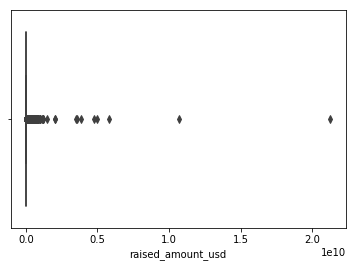

In [35]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.boxplot(master_frame['raised_amount_usd'])

In [36]:
master_frame1 = master_frame[(master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000)]
master_frame1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,1.000000e+07,/organization/-fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
6,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8.900000e+06,/organization/0xdata,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
7,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,1.040625e+07,/organization/1,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,1.040625e+07,/organization/1-618-technology,/organization/1-618-technology,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013
20,/organization/1000museums-com,/funding-round/6dcccfea326e6add866bf67aafb0a7df,convertible_note,NaN,01-12-2014,1.040625e+07,/organization/1000museums-com,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008


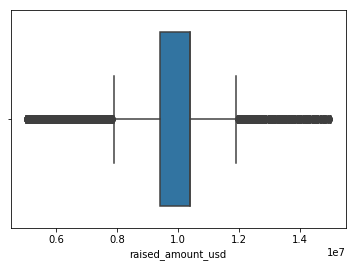

In [37]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.boxplot(master_frame1['raised_amount_usd'])

In [38]:
master_frame1['funding_round_type'].value_counts()

venture                  9571
seed                     3518
undisclosed              1716
equity_crowdfunding      1041
angel                     630
debt_financing            455
private_equity            330
convertible_note          204
grant                     112
post_ipo_equity            72
non_equity_assistance      59
secondary_market           29
product_crowdfunding       21
post_ipo_debt              10
Name: funding_round_type, dtype: int64

In [39]:
TOP_FT=master_frame1.groupby('funding_round_type')['raised_amount_usd'].mean()
TOP_FT.reset_index()


,funding_round_type,raised_amount_usd
0,angel,1.031582e+07
1,convertible_note,1.018672e+07
2,debt_financing,8.911881e+06
3,equity_crowdfunding,1.037541e+07
4,grant,9.311266e+06
5,non_equity_assistance,1.040625e+07
6,post_ipo_debt,9.237000e+06
7,post_ipo_equity,9.752399e+06
8,private_equity,9.997513e+06
9,product_crowdfunding,1.015133e+07


In [40]:
#venture       : $9.32 million 
#angel         : $10.31 million
#seed          : $10.34 million
#private equity: $9.99 milloin

# From above, SEED investments would be the most suitable, since 10.34 M USD is the highest mean returned after applying Teclov's $5-15M constraint.

### PROBLEM 3: COUNTRY ANALYSIS

#1. Teclov wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
#2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has
#received)

In [41]:

top_9_sum=master_frame1.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
top_9_sum=top_9_sum.reset_index()
top_9_sum=pd.DataFrame(top_9_sum)
top_9_sum=top_9_sum.iloc[:10,:]
top_9_sum

,country_code,raised_amount_usd
0,USA,1.036782e+11
1,GBR,8.039490e+09
2,CHN,6.206388e+09
3,CAN,4.570155e+09
4,DEU,4.426927e+09
5,IND,3.997834e+09
6,ISR,2.676892e+09
7,FRA,2.216294e+09
8,BRA,1.328341e+09
9,NLD,1.321541e+09


# from above, we see the top 9 countries which have recieved the highest total funding with 5-15M contraint applied across all FUNDING TYPES.

In [42]:
mf_seed=master_frame1[master_frame1['funding_round_type'] == 'seed'].sort_values(by='raised_amount_usd', ascending=False)
mf_seed.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
21599,/organization/hbi-solutions,/funding-round/3a490f49a95290f06056c45d6c57be5f,seed,NaN,01-12-2015,12600000.0,/organization/hbi-solutions,/organization/hbi-solutions,HBI Solutions,http://hbisolutions.com/,Software,operating,USA,CA,Bakersfield,California City,01-01-2011
37843,/organization/pioneer-square-labs,/funding-round/1897c15cc277b44e46d80694c1928b72,seed,NaN,01-10-2015,12500000.0,/organization/pioneer-square-labs,/organization/pioneer-square-labs,Pioneer Square Labs,http://www.pioneersquarelabs.com/,Investment Management|Startups|Technology|Vent...,operating,USA,WA,Seattle,Seattle,01-01-2015
35172,/organization/oncure-medical,/funding-round/cb04b429402a573bde2fd8068f3fe354,seed,NaN,07-07-2003,12000000.0,/organization/oncure-medical,/organization/oncure-medical,OnCURE Medical,http://www.oncure.com/,Health Care|Hospitals|Medical,operating,USA,CO,Denver,Englewood,01-01-1998
44841,/organization/silverback-enterprise-group-inc,/funding-round/3e38df9cb1d23093c7322b22fb0c99d8,seed,NaN,03-11-2010,11500000.0,/organization/silverback-enterprise-group-inc,/organization/silverback-enterprise-group-inc,"Silverback Enterprise Group, Inc.",http://silverbackeg.com/index.html,Enterprise Purchasing|Enterprise Software|Soft...,operating,USA,TX,Austin,Austin,01-01-2010
26200,/organization/keahole-solar-power,/funding-round/77938ca091d421ea7d5f4554b4a2f7dd,seed,NaN,01-01-2008,11000000.0,/organization/keahole-solar-power,/organization/keahole-solar-power,Keahole Solar Power,http://keaholesolarpower.com,Clean Technology,operating,USA,HI,Honolulu,Honolulu,05-07-2007


In [43]:
top9=mf_seed['country_code'].value_counts()
top9.head(9)

USA    1717
GBR     167
DEU     134
IND     108
CAN      75
ISR      55
IRL      44
BRA      43
ESP      39
Name: country_code, dtype: int64

# from above we see the top 9 countries who have recieved the highest number of SEED capitals ONLY. However, not all speak english.

# TOP 3 ENGLISH SPEAKING COUNTRIES----WHERE ENGLISH IS THE OFFICIAL LANGUAGE
# USA
# GBR
# CAN


In [44]:
mf_top3=mf_seed[mf_seed['country_code'].isin(['USA','GBR','CAN'])]
mf_top3.tail(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
7153,/organization/borrowell,/funding-round/7ea2afae210ce3f1c66f4ab8a1597bf4,seed,NaN,03-12-2014,5400000.0,/organization/borrowell,/organization/borrowell,Borrowell,http://borrowell.com,Credit|Finance|Financial Services,operating,CAN,ON,Toronto,Toronto,01-01-2014
27620,/organization/lending-works,/funding-round/4ce38876609a9a97426fc2b1ab7dbd0b,seed,NaN,01-01-2014,5303380.0,/organization/lending-works,/organization/lending-works,Lending Works,http://www.lendingworks.co.uk,Finance|Financial Services|Peer-to-Peer,operating,GBR,H9,London,London,01-11-2012
40502,/organization/radical-studios,/funding-round/7044b64b79579930a6d09147eecde290,seed,NaN,01-06-2008,5300000.0,/organization/radical-studios,/organization/radical-studios,Radical Studios,http://www.radicalstudios.com,Advertising,operating,USA,CA,Los Angeles,Los Angeles,01-06-2008
40285,/organization/quickshift,/funding-round/d524c92a386849e7adf4ce4b300e977c,seed,B,18-07-2005,5200000.0,/organization/quickshift,/organization/quickshift,Quickshift,NaN,Enterprise Software,operating,USA,TX,Austin,Austin,01-01-2000
51676,/organization/trutouch-technologies,/funding-round/a5b73d9f41cd10f462f58e5a6eeff6bd,seed,NaN,14-02-2013,5017863.0,/organization/trutouch-technologies,/organization/trutouch-technologies,TruTouch Technologies,http://www.trutouchtechnologies.com,Manufacturing|Test and Measurement,operating,USA,NM,Albuquerque,Albuquerque,01-01-2005


In [45]:
mf_top3.shape

(1959, 17)

### Problem 4: Sector Analysis 1

# Extract the primary sector of each category list from the category_list column

In [47]:
mf_top3['category_list'].head(10)

21599                                             Software
37843    Investment Management|Startups|Technology|Vent...
35172                        Health Care|Hospitals|Medical
44841    Enterprise Purchasing|Enterprise Software|Soft...
26200                                     Clean Technology
39224    Cloud Computing|Enterprise Purchasing|Enterpri...
39047                                   Mobile|Photography
39048                                           E-Commerce
39065                                        Biotechnology
39104          Developer APIs|Marketplaces|Mobile Commerce
Name: category_list, dtype: object

In [48]:
sss=mf_top3.loc[mf_top3.category_list == '|', 'category_list'] = mf_top3.category_list.str.split('|').str.get(0)
sss.head(10)

C:\Users\Prana\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21599                 Software
37843    Investment Management
35172              Health Care
44841    Enterprise Purchasing
26200         Clean Technology
39224          Cloud Computing
39047                   Mobile
39048               E-Commerce
39065            Biotechnology
39104           Developer APIs
Name: category_list, dtype: object

In [49]:
mf_top3['category_list']=sss
mf_top3.head(10)

C:\Users\Prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
21599,/organization/hbi-solutions,/funding-round/3a490f49a95290f06056c45d6c57be5f,seed,NaN,01-12-2015,1.260000e+07,/organization/hbi-solutions,/organization/hbi-solutions,HBI Solutions,http://hbisolutions.com/,Software,operating,USA,CA,Bakersfield,California City,01-01-2011
37843,/organization/pioneer-square-labs,/funding-round/1897c15cc277b44e46d80694c1928b72,seed,NaN,01-10-2015,1.250000e+07,/organization/pioneer-square-labs,/organization/pioneer-square-labs,Pioneer Square Labs,http://www.pioneersquarelabs.com/,Investment Management,operating,USA,WA,Seattle,Seattle,01-01-2015
35172,/organization/oncure-medical,/funding-round/cb04b429402a573bde2fd8068f3fe354,seed,NaN,07-07-2003,1.200000e+07,/organization/oncure-medical,/organization/oncure-medical,OnCURE Medical,http://www.oncure.com/,Health Care,operating,USA,CO,Denver,Englewood,01-01-1998
44841,/organization/silverback-enterprise-group-inc,/funding-round/3e38df9cb1d23093c7322b22fb0c99d8,seed,NaN,03-11-2010,1.150000e+07,/organization/silverback-enterprise-group-inc,/organization/silverback-enterprise-group-inc,"Silverback Enterprise Group, Inc.",http://silverbackeg.com/index.html,Enterprise Purchasing,operating,USA,TX,Austin,Austin,01-01-2010
26200,/organization/keahole-solar-power,/funding-round/77938ca091d421ea7d5f4554b4a2f7dd,seed,NaN,01-01-2008,1.100000e+07,/organization/keahole-solar-power,/organization/keahole-solar-power,Keahole Solar Power,http://keaholesolarpower.com,Clean Technology,operating,USA,HI,Honolulu,Honolulu,05-07-2007
39224,/organization/procurify,/funding-round/6a719cdf91edd9d7223b80cb974fcbb8,seed,NaN,26-11-2012,1.040625e+07,/organization/procurify,/organization/procurify,Procurify,https://www.procurify.com,Cloud Computing,operating,CAN,BC,BC - Other,Richmond,01-09-2012
39047,/organization/priime,/funding-round/9fc0677af55b2d7eedb1e43a54388912,seed,NaN,01-04-2015,1.040625e+07,/organization/priime,/organization/priime,Priime,http://priime.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,09-07-2014
39048,/organization/prim,/funding-round/97529c8a94c051dbc50673ffc6f7a420,seed,NaN,01-03-2013,1.040625e+07,/organization/prim,/organization/prim,Prim,http://getprim.com,E-Commerce,closed,USA,CA,SF Bay Area,San Francisco,01-01-2013
39065,/organization/prime-genomics,/funding-round/7bde452689a2c3ebd1ba260663750a39,seed,NaN,16-07-2013,1.040625e+07,/organization/prime-genomics,/organization/prime-genomics,Prime Genomics,http://primegenomics.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2010
39104,/organization/print-io,/funding-round/0ace103f03ad67785c20b8bac0369647,seed,NaN,12-02-2015,1.040625e+07,/organization/print-io,/organization/print-io,Print.io,http://print.io,Developer APIs,operating,USA,NY,New York City,New York,01-01-2010


# Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [51]:
mapping = pd.read_csv('mapping.csv')

In [52]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [53]:
mapp=mapping.set_index('category_list')

for i in mapp.columns:

    mapp[mapp[i]==1]=i

In [54]:
mapp.head()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,,
NaN,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks
3D,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing
3D Printing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing
3D Technology,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing
Accounting,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"


In [55]:
mapp=mapp.reset_index()
mapp.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks
1,3D,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing
2,3D Printing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing
3,3D Technology,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"


In [56]:
mapp=mapp.iloc[:,:2]
mapp.head()

,category_list,Automotive & Sports
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [57]:
mapp=mapp.rename(columns={'Automotive & Sports':'category'})
mapp.head()

,category_list,category
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [58]:
FINAL=pd.merge(mf_top3,mapp,on='category_list',how='inner')

In [59]:
FINAL.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,category
0,/organization/hbi-solutions,/funding-round/3a490f49a95290f06056c45d6c57be5f,seed,NaN,01-12-2015,1.260000e+07,/organization/hbi-solutions,/organization/hbi-solutions,HBI Solutions,http://hbisolutions.com/,Software,operating,USA,CA,Bakersfield,California City,01-01-2011,Others
1,/organization/quik-io,/funding-round/a9522428baf318836263a99e72d41531,seed,NaN,20-04-2011,1.040625e+07,/organization/quik-io,/organization/quik-io,Quik.io,http://quik.io,Software,acquired,USA,CA,SF Bay Area,Mountain View,03-02-2011,Others
2,/organization/providertrust,/funding-round/d9f193e6b693e6d65a2ed32e25a187dc,seed,NaN,02-07-2010,1.040625e+07,/organization/providertrust,/organization/providertrust,ProviderTrust,http://www.providertrust.com/oigexclusionlist,Software,operating,USA,TN,Nashville,Nashville,02-07-2010,Others
3,/organization/picplum,/funding-round/e521286bc4ebe8771966c8c7ad190307,seed,NaN,02-08-2011,1.040625e+07,/organization/picplum,/organization/picplum,Picplum,http://picplum.com,Software,operating,USA,CA,SF Bay Area,San Francisco,NaN,Others
4,/organization/safaba-translation-solutions,/funding-round/87573e9b92c18df7a1c355187a539372,seed,NaN,16-08-2012,1.040625e+07,/organization/safaba-translation-solutions,/organization/safaba-translation-solutions,Safaba Translation Solutions,http://safaba.com,Software,acquired,USA,PA,Pittsburgh,Pittsburgh,01-01-2009,Others


### Problem 5: Sector Analysis 2

#1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within 
#the 5-15 million USD range. The three data frames should contain:
#All the columns of the master_frame along with the primary sector and the main sector
#The total number (or count) of investments for each main sector in a separate column
#The total amount invested in each main sector in a separate column


In [60]:
D1=FINAL[FINAL['country_code'] == 'USA']
D1.tail(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,category
1770,/organization/usens-inc-,/funding-round/0fa274d1dfbde6bbefd4360072b95b58,seed,NaN,14-09-2015,5500000.0,/organization/usens-inc-,/organization/usens-inc-,uSens,http://www.usens.com/,Innovation Engineering,operating,USA,CA,SF Bay Area,San Jose,01-01-2013,"Social, Finance, Analytics, Advertising"
1771,/organization/luxe-valet,/funding-round/850aef2686ffd700ad64d3caaae7455c,seed,NaN,23-10-2014,5500000.0,/organization/luxe-valet,/organization/luxe-valet,Luxe,http://www.luxe.com/,Mobile Devices,operating,USA,CA,SF Bay Area,San Francisco,01-06-2013,"News, Search and Messaging"


In [61]:
sub_D1=D1['category'].value_counts().reset_index()
sub_D1.columns=['USA-category','count']
sub_D1

,USA-category,count
0,Others,343
1,"Social, Finance, Analytics, Advertising",333
2,"News, Search and Messaging",329
3,Entertainment,162
4,Manufacturing,101
5,Health,100
6,Blanks,78
7,Cleantech / Semiconductors,67
8,Automotive & Sports,42


In [62]:
D1=pd.merge(D1,sub_D1,how='inner',left_on='category',right_on='USA-category')
D1=D1.drop('category',axis=1)
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,USA-category,count
0,/organization/hbi-solutions,/funding-round/3a490f49a95290f06056c45d6c57be5f,seed,NaN,01-12-2015,1.260000e+07,/organization/hbi-solutions,/organization/hbi-solutions,HBI Solutions,http://hbisolutions.com/,Software,operating,USA,CA,Bakersfield,California City,01-01-2011,Others,343
1,/organization/quik-io,/funding-round/a9522428baf318836263a99e72d41531,seed,NaN,20-04-2011,1.040625e+07,/organization/quik-io,/organization/quik-io,Quik.io,http://quik.io,Software,acquired,USA,CA,SF Bay Area,Mountain View,03-02-2011,Others,343
2,/organization/providertrust,/funding-round/d9f193e6b693e6d65a2ed32e25a187dc,seed,NaN,02-07-2010,1.040625e+07,/organization/providertrust,/organization/providertrust,ProviderTrust,http://www.providertrust.com/oigexclusionlist,Software,operating,USA,TN,Nashville,Nashville,02-07-2010,Others,343
3,/organization/picplum,/funding-round/e521286bc4ebe8771966c8c7ad190307,seed,NaN,02-08-2011,1.040625e+07,/organization/picplum,/organization/picplum,Picplum,http://picplum.com,Software,operating,USA,CA,SF Bay Area,San Francisco,NaN,Others,343
4,/organization/safaba-translation-solutions,/funding-round/87573e9b92c18df7a1c355187a539372,seed,NaN,16-08-2012,1.040625e+07,/organization/safaba-translation-solutions,/organization/safaba-translation-solutions,Safaba Translation Solutions,http://safaba.com,Software,acquired,USA,PA,Pittsburgh,Pittsburgh,01-01-2009,Others,343


In [63]:
D1_inv=D1.groupby('USA-category')['raised_amount_usd'].sum()
D1_inv=D1_inv.reset_index()
D1_inv.columns=['USA-category','total inv. in main sec.']
D1_inv.sort_values(by='total inv. in main sec.',ascending=False)

,USA-category,total inv. in main sec.
7,Others,3.553100e+09
8,"Social, Finance, Analytics, Advertising",3.435151e+09
6,"News, Search and Messaging",3.410487e+09
3,Entertainment,1.685812e+09
5,Manufacturing,1.034179e+09
4,Health,1.029594e+09
1,Blanks,8.116875e+08
2,Cleantech / Semiconductors,6.851172e+08
0,Automotive & Sports,4.346562e+08


In [64]:
D1=pd.merge(D1,D1_inv,how='inner',left_on='USA-category',right_on='USA-category')
D1.sort_values(by='total inv. in main sec.', ascending=False).head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,USA-category,count,total inv. in main sec.
0,/organization/hbi-solutions,/funding-round/3a490f49a95290f06056c45d6c57be5f,seed,NaN,01-12-2015,1.260000e+07,/organization/hbi-solutions,/organization/hbi-solutions,HBI Solutions,http://hbisolutions.com/,Software,operating,USA,CA,Bakersfield,California City,01-01-2011,Others,343,3.553100e+09
226,/organization/taptolearn,/funding-round/1686d87747245de46c551f15782e342e,seed,NaN,01-04-2012,1.040625e+07,/organization/taptolearn,/organization/taptolearn,TapToLearn,http://www.taptolearn.com,Education,operating,USA,CA,SF Bay Area,Menlo Park,01-01-2010,Others,343,3.553100e+09
234,/organization/cambly,/funding-round/b0697f6a31e938dee92e419d56951f92,seed,NaN,01-01-2014,1.040625e+07,/organization/cambly,/organization/cambly,Cambly,http://cambly.com,Education,operating,USA,CA,SF Bay Area,San Francisco,02-11-2012,Others,343,3.553100e+09
233,/organization/classwork,/funding-round/5192a6753d973c2b31784411a515241e,seed,NaN,14-01-2014,1.040625e+07,/organization/classwork,/organization/classwork,Classkick,http://www.getclasskick.com,Education,operating,USA,IL,Chicago,Chicago,01-10-2013,Others,343,3.553100e+09
232,/organization/classbadges-com,/funding-round/6304baf136dc66e794d8803225e35108,seed,NaN,01-01-2012,1.040625e+07,/organization/classbadges-com,/organization/classbadges-com,ClassBadges,http://classbadges.com,Education,operating,USA,CA,SF Bay Area,Oakland,01-08-2012,Others,343,3.553100e+09


In [65]:
D2=FINAL[FINAL['country_code'] == 'GBR']
sub_D2=D2['category'].value_counts().reset_index()
sub_D2.columns=['GBR-category','count']
D2=pd.merge(D2,sub_D2,how='inner',left_on='category',right_on='GBR-category')
D2=D2.drop('category',axis=1)
D2_inv=D2.groupby('GBR-category')['raised_amount_usd'].sum()
D2_inv=D2_inv.reset_index()
D2_inv.columns=['GBR-category','total inv. in main sec.']
D2_inv.sort_values(by='total inv. in main sec.',ascending=False)

,GBR-category,total inv. in main sec.
6,"News, Search and Messaging",3.992928e+08
8,"Social, Finance, Analytics, Advertising",3.934155e+08
7,Others,3.017812e+08
3,Entertainment,2.081250e+08
4,Health,7.284375e+07
2,Cleantech / Semiconductors,5.203125e+07
5,Manufacturing,5.203125e+07
1,Blanks,4.162500e+07
0,Automotive & Sports,1.040625e+07


In [66]:
D2=pd.merge(D2,D2_inv,how='inner',left_on='GBR-category',right_on='GBR-category')
D2.sort_values(by='total inv. in main sec.', ascending=False).head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,GBR-category,count,total inv. in main sec.
74,/organization/fuelmyblog,/funding-round/41ef1dcaab3d869038d03de15fac8dac,seed,NaN,01-10-2007,1.040625e+07,/organization/fuelmyblog,/organization/fuelmyblog,FuelMyBlog,http://www.fuelmyblog.com,Blogging Platforms,operating,GBR,L9,Sheffield,Sheffield,01-07-2007,"News, Search and Messaging",39,3.992928e+08
50,/organization/nuji,/funding-round/14e502ab5fc3449b73339f8a8f485320,seed,NaN,16-09-2010,1.040625e+07,/organization/nuji,/organization/nuji,Nuji,http://www.nuji.com,Curated Web,operating,GBR,H9,London,London,15-11-2011,"News, Search and Messaging",39,3.992928e+08
57,/organization/belocal,/funding-round/18fd0475c615982d0164d5c76bb5c3f9,seed,NaN,01-01-2008,1.040625e+07,/organization/belocal,/organization/belocal,BeLocal,http://belocal.com,Curated Web,operating,GBR,N5,GBR - Other,Hessett,01-01-2008,"News, Search and Messaging",39,3.992928e+08
56,/organization/swipe-to,/funding-round/5744f8ed1e4ad1a3cc7ef451deeeb305,seed,NaN,31-07-2013,1.040625e+07,/organization/swipe-to,/organization/swipe-to,Swipe.to,http://www.swipe.to,Curated Web,operating,GBR,H9,London,London,01-11-2012,"News, Search and Messaging",39,3.992928e+08
55,/organization/tailster,/funding-round/da2a4db68c406118eb9c01bf8b1491f8,seed,NaN,08-03-2015,1.040625e+07,/organization/tailster,/organization/tailster,Tailster,http://www.tailster.com,Curated Web,operating,GBR,H9,London,London,01-03-2014,"News, Search and Messaging",39,3.992928e+08


In [67]:
D3=FINAL[FINAL['country_code'] == 'CAN']
sub_D3=D3['category'].value_counts().reset_index()
sub_D3.columns=['CAN-category','count']
D3=pd.merge(D3,sub_D3,how='inner',left_on='category',right_on='CAN-category')
D3=D3.drop('category',axis=1)
D3_inv=D3.groupby('CAN-category')['raised_amount_usd'].sum()
D3_inv=D3_inv.reset_index()
D3_inv.columns=['CAN-category','total inv. in main sec.']
D3_inv.sort_values(by='total inv. in main sec.',ascending=False)

,CAN-category,total inv. in main sec.
6,"News, Search and Messaging",1.873125e+08
8,"Social, Finance, Analytics, Advertising",1.671937e+08
7,Others,1.301200e+08
3,Entertainment,5.203125e+07
1,Blanks,4.162500e+07
2,Cleantech / Semiconductors,4.162500e+07
5,Manufacturing,4.162500e+07
0,Automotive & Sports,2.081250e+07
4,Health,2.081250e+07


In [68]:
D3=pd.merge(D3,D3_inv,how='inner',left_on='CAN-category',right_on='CAN-category')
D3.sort_values(by='total inv. in main sec.', ascending=False).head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,CAN-category,count,total inv. in main sec.
28,/organization/quiet-ly,/funding-round/98b97ec1e2136b4ca3e5069ea35a5f6e,seed,NaN,01-02-2013,1.040625e+07,/organization/quiet-ly,/organization/quiet-ly,Quietly,http://quiet.ly,Publishing,operating,CAN,BC,Vancouver,Vancouver,01-01-2013,"News, Search and Messaging",18,1.873125e+08
15,/organization/mover,/funding-round/c30e716bb7fee5cb9d9c9558e7dd4d23,seed,NaN,22-05-2012,1.040625e+07,/organization/mover,/organization/mover,Mover,http://www.mover.io,Cloud Computing,operating,CAN,AB,Edmonton,Edmonton,01-01-2012,"News, Search and Messaging",18,1.873125e+08
30,/organization/fabric-technologies,/funding-round/bda2a88bdaefdef6dbcc24a44acf324b,seed,NaN,01-12-2010,1.040625e+07,/organization/fabric-technologies,/organization/fabric-technologies,Fabric Engine,http://fabricengine.com,Browser Extensions,operating,CAN,QC,Montreal,MontrÃ©al,01-07-2010,"News, Search and Messaging",18,1.873125e+08
29,/organization/sweetiq-analytics,/funding-round/126328565fb78345fde7560d08c472e9,seed,NaN,01-11-2011,1.040625e+07,/organization/sweetiq-analytics,/organization/sweetiq-analytics,SweetIQ Analytics,http://sweetiq.com,Local Search,operating,CAN,QC,Montreal,MontrÃ©al,13-09-2010,"News, Search and Messaging",18,1.873125e+08
27,/organization/factyle,/funding-round/3dd232cbd3a6279b11e646dcb412cc5d,seed,NaN,01-01-2011,1.040625e+07,/organization/factyle,/organization/factyle,Factyle,NaN,Apps,operating,CAN,QC,Montreal,MontrÃ©al,01-01-2011,"News, Search and Messaging",18,1.873125e+08


In [69]:
print(sub_D1['count'].sum())
print(sub_D2['count'].sum())
print(sub_D3['count'].sum())

1555
149
69


In [70]:
print(D1_inv['total inv. in main sec.'].sum())
print(D2_inv['total inv. in main sec.'].sum())
print(D3_inv['total inv. in main sec.'].sum())

16079784901.241581
1531552032.0583017
703157536.9013165


In [71]:
print(sub_D1)
print(sub_D2)
print(sub_D3)


                              USA-category  count
0                                   Others    343
1  Social, Finance, Analytics, Advertising    333
2               News, Search and Messaging    329
3                            Entertainment    162
4                            Manufacturing    101
5                                   Health    100
6                                   Blanks     78
7               Cleantech / Semiconductors     67
8                      Automotive & Sports     42
                              GBR-category  count
0  Social, Finance, Analytics, Advertising     39
1               News, Search and Messaging     39
2                                   Others     29
3                            Entertainment     20
4                                   Health      7
5                            Manufacturing      5
6               Cleantech / Semiconductors      5
7                                   Blanks      4
8                      Automotive & Sports      1


### #For the second sector count-wise which compnay received the highest investment?

In [72]:
sec_best_D1=D1[D1['USA-category'] == 'Social, Finance, Analytics, Advertising']
sec_best_D1.sort_values(by='raised_amount_usd', ascending=False).head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,USA-category,count,total inv. in main sec.
443,/organization/silverback-enterprise-group-inc,/funding-round/3e38df9cb1d23093c7322b22fb0c99d8,seed,NaN,03-11-2010,1.150000e+07,/organization/silverback-enterprise-group-inc,/organization/silverback-enterprise-group-inc,"Silverback Enterprise Group, Inc.",http://silverbackeg.com/index.html,Enterprise Purchasing,operating,USA,TX,Austin,Austin,01-01-2010,"Social, Finance, Analytics, Advertising",333,3.435151e+09
670,/organization/thatsmighty,/funding-round/3818877e5643f41110cd7d71631e35ec,seed,NaN,08-05-2014,1.040625e+07,/organization/thatsmighty,/organization/thatsmighty,Mighty,https://mighty.com,FinTech,operating,USA,NY,New York City,Manhattan,01-01-2015,"Social, Finance, Analytics, Advertising",333,3.435151e+09
668,/organization/gigzolo,/funding-round/4b3c6a68ae6ed40e89e1cf8a1b131818,seed,NaN,30-09-2014,1.040625e+07,/organization/gigzolo,/organization/gigzolo,Gigzolo,http://www.gigzolo.com,Databases,operating,USA,NY,New York City,New York,01-01-2012,"Social, Finance, Analytics, Advertising",333,3.435151e+09


In [73]:
sec_best_D2=D2[D2['GBR-category'] == 'Others']
sec_best_D2.sort_values(by='raised_amount_usd', ascending=False).head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,GBR-category,count,total inv. in main sec.
0,/organization/unifyo,/funding-round/3bd594d1047e3342318ca38069d7579b,seed,NaN,28-10-2011,1.040625e+07,/organization/unifyo,/organization/unifyo,Unifyo,http://unifyo.com,Software,operating,GBR,C3,London,Cambridge,01-10-2010,Others,29,3.017812e+08
15,/organization/rawstream,/funding-round/31eaeaab5cdb637fb9f2311814e10016,seed,NaN,31-01-2012,1.040625e+07,/organization/rawstream,/organization/rawstream,Rawstream,http://rawstream.com,SaaS,operating,GBR,H9,London,London,NaN,Others,29,3.017812e+08
27,/organization/kindo-network,/funding-round/4d7c5834f7755d3b03d036c8f207817d,seed,NaN,07-02-2008,1.040625e+07,/organization/kindo-network,/organization/kindo-network,Kindo Network,http://kindo.com,Web Hosting,acquired,GBR,H9,London,London,01-04-2007,Others,29,3.017812e+08


In [74]:
sec_best_D3=D3[D3['CAN-category'] == 'Social, Finance, Analytics, Advertising']
sec_best_D3.sort_values(by='raised_amount_usd', ascending=False).head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,CAN-category,count,total inv. in main sec.
35,/organization/picatic,/funding-round/11f5a7533119a2eb3c9d2fc5f4c04464,seed,NaN,01-09-2012,1.040625e+07,/organization/picatic,/organization/picatic,Picatic,https://www.picatic.com,Developer APIs,operating,CAN,BC,Vancouver,Vancouver,01-01-2009,"Social, Finance, Analytics, Advertising",17,1.671937e+08
44,/organization/brightkit,/funding-round/29579bc7948ec51147f0729ebbc3d390,seed,NaN,26-09-2013,1.040625e+07,/organization/brightkit,/organization/brightkit,Brightkit,http://brightkit.com,Social Media,acquired,CAN,BC,Vancouver,Vancouver,01-01-2006,"Social, Finance, Analytics, Advertising",17,1.671937e+08
50,/organization/get-me-listed,/funding-round/7611a1bdabd4d53a8967cd0b461254c7,seed,NaN,27-04-2012,1.040625e+07,/organization/get-me-listed,/organization/get-me-listed,Get Me Listed,http://www.sweetiq.com,Local Advertising,operating,CAN,QC,Montreal,MontrÃ©al,NaN,"Social, Finance, Analytics, Advertising",17,1.671937e+08


### FINAL RESULTS

In [75]:
FINAL_TABLE=pd.read_excel('Final Results.xlsx')
FINAL_TABLE

,Unnamed: 0,USA,GBR,CAN
0,Total no. of investments (count),1555,149,69
1,Total amount of investment (usd),1.60798e+10,1.53155e+09,7.03158e+08
2,top sector (based on count of investments),others,"News, Search and Messaging & Social, Finance, ...","News, Search and Messaging"
3,2nd-best sector (based in count of investments),"Social, Finance, Analytics, Advertising",Others,"Social, Finance, Analytics, Advertising"
4,3rd-best sector (based in count of investments),"News, Search and Messaging",Entertainment,Others
5,No. of investments in top sector,343,39,18
6,No. of investments in 2nd best sector,333,29,17
7,No. of investments in 3rd best sector,329,20,13
8,For the top sector count-wise which compnay r...,HBI Solutions,FuelMyBlog,Quietly
9,For the second sector count-wise which compna...,"Silverback Enterprise Group, Inc.",Unifyo,Picatic


### Problem 6: Plots


#1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment 
in each funding type.This chart should make it clear that a certain funding type (FT) is best suited for Teclov.
#2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries 
(Country 1, Country 2, and Country 3) very clear.
#3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [76]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

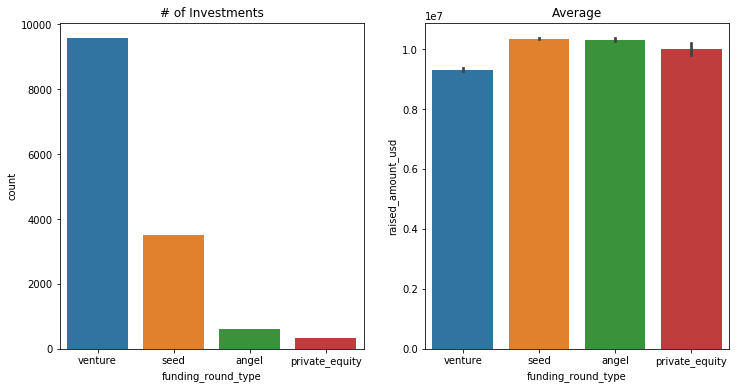

In [77]:
mf_plot1 = master_frame1[master_frame1['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sb.countplot(x="funding_round_type", data=mf_plot1)
plt.title("# of Investments")

plt.subplot(1, 2, 2)
sb.barplot(y='raised_amount_usd', x="funding_round_type", data=mf_plot1, estimator=np.mean)
plt.title("Average")

plt.show()

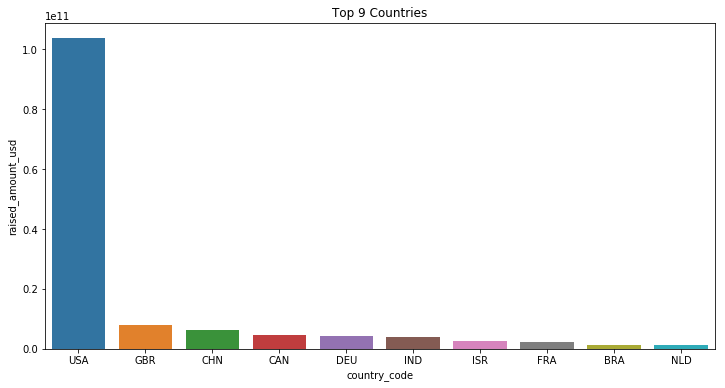

In [78]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
sb.barplot(y='raised_amount_usd', x='country_code', data=top_9_sum)
plt.title("Top 9 Countries")

plt.show()